In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/data69562/train.csv')
test = pd.read_csv('data/data69562/test.csv')
submit = pd.read_csv('data/data69562/submit.csv')
train.shape, test.shape, submit.shape

((40000, 21), (15000, 20), (15000, 2))

In [ ]:
train.head()

,id,XINGBIE,CSNY,HYZK,ZHIYE,ZHICHEN,ZHIWU,XUELI,DWJJLX,DWSSHY,...,GRZHZT,GRZHYE,GRZHSNJZYE,GRZHDNGJYE,GRYJCE,DWYJCE,DKFFE,DKYE,DKLL,label
0,train_0,1,1038672000,90,90,999,0,99,150,12,...,1,3223.515,801.310,837.000,312.00,312.00,175237,154112.935,2.708,0
1,train_1,2,504892800,90,90,999,0,99,110,0,...,1,18055.195,53213.220,1065.200,795.84,795.84,300237,298252.945,2.979,0
2,train_2,1,736185600,90,90,999,0,99,150,9,...,1,27426.600,13963.140,7230.020,1444.20,1444.20,150237,147339.130,2.708,0
3,train_3,1,428515200,90,90,999,0,99,150,7,...,1,111871.130,99701.265,2271.295,1417.14,1417.14,350237,300653.780,2.708,0
4,train_4,2,544204800,90,90,999,0,99,900,14,...,1,237.000,11028.875,35.780,325.50,325.50,150237,145185.010,2.708,0


In [3]:
cate_2_cols = ['XINGBIE', 'ZHIWU', 'XUELI']
cate_cols = ['HYZK', 'ZHIYE', 'ZHICHEN', 'DWJJLX', 'DWSSHY', 'GRZHZT']
train[cate_cols]

,HYZK,ZHIYE,ZHICHEN,DWJJLX,DWSSHY,GRZHZT
0,90,90,999,150,12,1
1,90,90,999,110,0,1
2,90,90,999,150,9,1
3,90,90,999,150,7,1
4,90,90,999,900,14,1
5,90,90,999,150,14,1
6,90,90,999,160,2,1
7,90,90,999,150,7,1
8,90,90,999,150,9,1
9,90,90,999,150,14,1


In [4]:
num_cols = ['GRJCJS', 'GRZHYE', 'GRZHSNJZYE', 'GRZHDNGJYE', 'GRYJCE', 'DWYJCE','DKFFE', 'DKYE', 'DKLL']
train[num_cols]

,GRJCJS,GRZHYE,GRZHSNJZYE,GRZHDNGJYE,GRYJCE,DWYJCE,DKFFE,DKYE,DKLL
0,1737.0,3223.515,801.310,837.000,312.000,312.000,175237,154112.935,2.708
1,4894.0,18055.195,53213.220,1065.200,795.840,795.840,300237,298252.945,2.979
2,10297.0,27426.600,13963.140,7230.020,1444.200,1444.200,150237,147339.130,2.708
3,10071.5,111871.130,99701.265,2271.295,1417.140,1417.140,350237,300653.780,2.708
4,2007.0,237.000,11028.875,35.780,325.500,325.500,150237,145185.010,2.708
5,1192.0,9648.315,7388.550,771.800,303.850,303.850,150237,149743.210,2.708
6,7297.0,22846.975,12179.565,5885.000,801.800,801.800,150237,146723.725,2.708
7,1399.0,1808.135,6405.055,1050.400,318.340,318.340,125237,64938.955,2.708
8,6408.0,79304.635,52365.820,6161.160,977.520,977.520,300237,270579.955,2.979
9,3573.5,2009.000,61126.175,536.750,637.380,637.380,230237,142296.640,2.708


特征工程

In [5]:
df = pd.concat([train, test], axis = 0).reset_index(drop = True)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


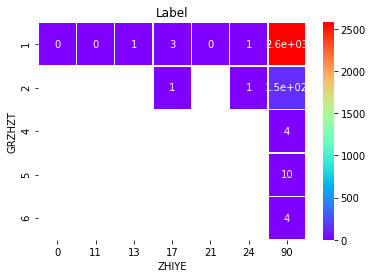

In [6]:
summary=pd.pivot_table(data=df,
                        index='GRZHZT',
                        columns='ZHIYE',
                        values='label',
                        aggfunc=np.sum)

sns.heatmap(data=summary,
            cmap='rainbow',
            annot=True,
            # fmt='.2e',  #科学计数法 保留2位小数
            linewidth=0.5)
plt.title('Label')
plt.show()

#找到GRJCJS银行状态  生成独热码   加入特征  
#ZHIWU  

In [7]:
# Find correlations with the target and sort
correlations = train.corr()['label'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 ZHIWU        -0.003333
XUELI         0.003333
HYZK          0.004700
XINGBIE       0.015031
GRZHSNJZYE    0.038202
DKFFE         0.038685
GRZHDNGJYE    0.056299
DWJJLX        0.068241
GRZHYE        0.072144
GRJCJS        0.105554
DWYJCE        0.137907
GRYJCE        0.137907
GRZHZT        0.172637
DWSSHY        0.194720
label         1.000000
Name: label, dtype: float64

Most Negative Correlations:
 DKYE         -0.077696
DKLL         -0.058240
ZHICHEN      -0.020456
CSNY         -0.010677
ZHIYE        -0.006686
ZHIWU        -0.003333
XUELI         0.003333
HYZK          0.004700
XINGBIE       0.015031
GRZHSNJZYE    0.038202
DKFFE         0.038685
GRZHDNGJYE    0.056299
DWJJLX        0.068241
GRZHYE        0.072144
GRJCJS        0.105554
Name: label, dtype: float64


In [9]:
df.shape

(55000, 21)

In [10]:
#One hot
cate_var=['GRZHZT','ZHIYE']
# df_var=df
for var in cate_var:
    df=pd.concat([df,pd.get_dummies(df[var],prefix=var)],1)
    # df=df.drop(var,1)


One_Hot=['GRZHZT_1','GRZHZT_2','GRZHZT_4','GRZHZT_5','GRZHZT_6','ZHIYE_0','ZHIYE_11','ZHIYE_13','ZHIYE_17','ZHIYE_21' ,'ZHIYE_24','ZHIYE_90']
for hot in One_Hot:
    df[hot]=df[hot].astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 33 columns):
CSNY          55000 non-null int64
DKFFE         55000 non-null int64
DKLL          55000 non-null float64
DKYE          55000 non-null float64
DWJJLX        55000 non-null int64
DWSSHY        55000 non-null int64
DWYJCE        55000 non-null float64
GRJCJS        55000 non-null float64
GRYJCE        55000 non-null float64
GRZHDNGJYE    55000 non-null float64
GRZHSNJZYE    55000 non-null float64
GRZHYE        55000 non-null float64
GRZHZT        55000 non-null int64
HYZK          55000 non-null int64
XINGBIE       55000 non-null int64
XUELI         55000 non-null int64
ZHICHEN       55000 non-null int64
ZHIWU         55000 non-null int64
ZHIYE         55000 non-null int64
id            55000 non-null object
label         40000 non-null float64
GRZHZT_1      55000 non-null int64
GRZHZT_2      55000 non-null int64
GRZHZT_4      55000 non-null int64
GRZHZT_5      55000 non-null int

In [11]:
df.shape

(55000, 33)

In [ ]:
df['missing_rate'] = (df.shape[1] - df.count(axis = 1)) / df.shape[1]

df['DKFFE_DKYE'] = df['DKFFE'] + df['DKYE']  #发放贷款金额+贷款余额
df['DKFFE_DKY_multi_DKLL'] = (df['DKFFE'] + df['DKYE']) * df['DKLL']  #（发放贷款金额+贷款余额）*贷款利率=C1
df['DKFFE_multi_DKLL'] = df['DKFFE'] * df['DKLL']  #发放贷款金额*贷款利率
df['DKYE_multi_DKLL'] = df['DKYE'] * df['DKLL']  #余额*贷款利率
df['GRYJCE_DWYJCE'] = df['GRYJCE'] + df['DWYJCE']  #个人月缴存余额+单位月缴存余额
df['GRZHDNGJYE_GRZHSNJZYE'] = df['GRZHDNGJYE'] + df['GRZHSNJZYE'] #个人账户当年归集余额+个人账户上年结转余额

df['DKFFE_multi_DKLL_ratio'] = df['DKFFE'] * df['DKLL'] / df['DKFFE_DKY_multi_DKLL']  # 发放贷款金额/(发放贷款金额+贷款余额)
df['DKYE_multi_DKLL_ratio'] = df['DKYE'] * df['DKLL'] / df['DKFFE_DKY_multi_DKLL']   # 贷款余额/(发放贷款金额+贷款余额)
df['DKYE_DKFFE_ratio'] = df['DKYE'] / df['DKFFE_DKYE']    # 贷款余额/(发放贷款金额+贷款余额)
df['DKFFE_DKYE_ratio'] = df['DKFFE'] / df['DKFFE_DKYE']  # 发放贷款金额/(发放贷款金额+贷款余额)
df['GRZHYE_diff_GRZHDNGJYE'] = df['GRZHYE'] - df['GRZHDNGJYE'] #个人账户余额-个人账户当年归集余额
df['GRZHYE_diff_GRZHSNJZYE'] = df['GRZHYE'] - df['GRZHSNJZYE'] #个人账户余额-个人账户上年结转余额
df['GRYJCE_DWYJCE_ratio'] = df['GRYJCE'] / df['GRYJCE_DWYJCE'] #个人月缴存余额/(个人月缴存余额+单位月缴存余额)
df['DWYJCE_GRYJCE_ratio'] = df['DWYJCE'] / df['GRYJCE_DWYJCE'] #单位月缴存余额/(个人月缴存余额+单位月缴存余额)

df['DWYSSHY2GRYJCE']=df['DWSSHY'] * df['DWSSHY']*df['GRYJCE']#所属行业*所属行业*个人月缴存额
# df['DWJJLX_DWYSSHY']=df['DWJJLX'] * df['DWSSHY']  #单位经济体行业*单位经济体行业

gen_feats = ['DKFFE_DKYE', 'DKFFE_DKY_multi_DKLL', 'DKFFE_multi_DKLL', 'DKYE_multi_DKLL', 'GRYJCE_DWYJCE', 
             'GRZHDNGJYE_GRZHSNJZYE', 'DKFFE_multi_DKLL_ratio', 'DKYE_multi_DKLL_ratio', 'GRZHYE_diff_GRZHDNGJYE',
            'GRZHYE_diff_GRZHSNJZYE', 'GRYJCE_DWYJCE_ratio', 'DWYJCE_GRYJCE_ratio', 'DKYE_DKFFE_ratio', 'DKFFE_DKYE_ratio','DWYSSHY2GRYJCE']

# gen_feats = ['DKFFE_DKYE', 'DKFFE_DKY_multi_DKLL', 'DKFFE_multi_DKLL', 'DKYE_multi_DKLL', 'GRYJCE_DWYJCE', 
#              'GRZHDNGJYE_GRZHSNJZYE', 'DKFFE_multi_DKLL_ratio', 'DKYE_multi_DKLL_ratio', 'GRZHYE_diff_GRZHDNGJYE',
#             'GRZHYE_diff_GRZHSNJZYE', 'GRYJCE_DWYJCE_ratio', 'DWYJCE_GRYJCE_ratio', 'DKYE_DKFFE_ratio', 'DKFFE_DKYE_ratio','DWYSSHY2GRYJCE',
#             'GRZHZT_1','GRZHZT_2','GRZHZT_4','GRZHZT_5','GRZHZT_6','ZHIYE_0','ZHIYE_11','ZHIYE_13','ZHIYE_17','ZHIYE_21' ,'ZHIYE_24','ZHIYE_90']

#找到GRJCJS银行状态  生成独热码   加入特征  
#ZHIWU    


df.head()

,CSNY,DKFFE,DKLL,DKYE,DWJJLX,DWSSHY,DWYJCE,GRJCJS,GRYJCE,GRZHDNGJYE,...,GRZHDNGJYE_GRZHSNJZYE,DKFFE_multi_DKLL_ratio,DKYE_multi_DKLL_ratio,DKYE_DKFFE_ratio,DKFFE_DKYE_ratio,GRZHYE_diff_GRZHDNGJYE,GRZHYE_diff_GRZHSNJZYE,GRYJCE_DWYJCE_ratio,DWYJCE_GRYJCE_ratio,DWYSSHY2GRYJCE
0,1038672000,175237,2.708,154112.935,150,12,312.00,1737.0,312.00,837.000,...,1638.310,0.532069,0.467931,0.467931,0.532069,2386.515,2422.205,0.5,0.5,44928.00
1,504892800,300237,2.979,298252.945,110,0,795.84,4894.0,795.84,1065.200,...,54278.420,0.501658,0.498342,0.498342,0.501658,16989.995,-35158.025,0.5,0.5,0.00
2,736185600,150237,2.708,147339.130,150,9,1444.20,10297.0,1444.20,7230.020,...,21193.160,0.504869,0.495131,0.495131,0.504869,20196.580,13463.460,0.5,0.5,116980.20
3,428515200,350237,2.708,300653.780,150,7,1417.14,10071.5,1417.14,2271.295,...,101972.560,0.538089,0.461911,0.461911,0.538089,109599.835,12169.865,0.5,0.5,69439.86
4,544204800,150237,2.708,145185.010,900,14,325.50,2007.0,325.50,35.780,...,11064.655,0.508550,0.491450,0.491450,0.508550,201.220,-10791.875,0.5,0.5,63798.00


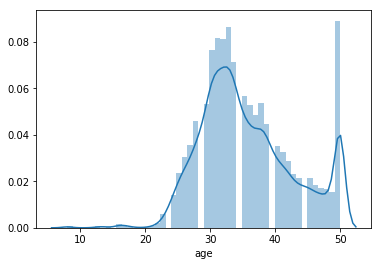

In [ ]:
def get_age(df,col = 'age'):
    df[col+"_genFeat1"]=(df['age'] > 18).astype(int)
    df[col+"_genFeat2"]=(df['age'] > 25).astype(int)
    df[col+"_genFeat3"]=(df['age'] > 30).astype(int)
    df[col+"_genFeat4"]=(df['age'] > 35).astype(int)
    df[col+"_genFeat5"]=(df['age'] > 40).astype(int)
    df[col+"_genFeat6"]=(df['age'] > 45).astype(int)
    return df, [col + f'_genFeat{i}' for i in range(1, 7)]

df['age'] = ((1609430399 - df['CSNY']) / (365 * 24 * 3600)).astype(int)
df, genFeats1 = get_age(df, col = 'age')

sns.distplot(df['age'][df['age'] > 0])

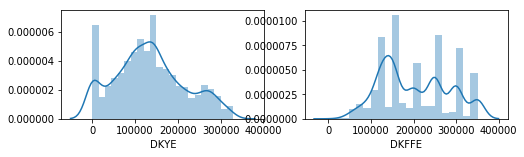

In [ ]:
def get_daikuanYE(df,col):
    df[col + '_genFeat1'] = (df[col] > 100000).astype(int)
    df[col + '_genFeat2'] = (df[col] > 120000).astype(int)
    df[col + '_genFeat3'] = (df[col] > 140000).astype(int)
    df[col + '_genFeat4'] = (df[col] > 180000).astype(int)
    df[col + '_genFeat5'] = (df[col] > 220000).astype(int)
    df[col + '_genFeat6'] = (df[col] > 260000).astype(int)
    df[col + '_genFeat7'] = (df[col] > 300000).astype(int)
    return df, [col + f'_genFeat{i}' for i in range(1, 8)]

df, genFeats2 = get_daikuanYE(df, col = 'DKYE')
df, genFeats3 = get_daikuanYE(df, col = 'DKFFE')


plt.figure(figsize = (8, 2))
plt.subplot(1,2,1)
sns.distplot(df['DKYE'][df['label'] == 1])
plt.subplot(1,2,2)
sns.distplot(df['DKFFE'][df['label'] == 1])

(40000, 70)

(15000, 70)

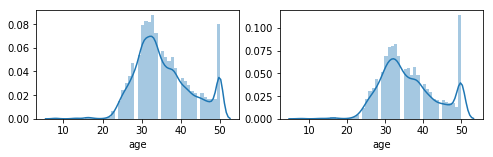

In [ ]:
train_df = df[df['label'].isna() == False].reset_index(drop=True)
test_df = df[df['label'].isna() == True].reset_index(drop=True)
display(train_df.shape, test_df.shape)

plt.figure(figsize = (8, 2))
plt.subplot(1,2,1)
sns.distplot(train_df['age'][train_df['age'] > 0])
plt.subplot(1,2,2)
sns.distplot(test_df['age'][test_df['age'] > 0])

In [ ]:
# gen_feats_fest = ['age','HYZK','ZHIYE','ZHICHEN','ZHIWU','XUELI','DWJJLX','DWSSHY','GRJCJS','GRZHZT','GRZHYE','GRZHSNJZYE','GRZHDNGJYE','GRYJCE','DWYJCE','DKFFE','DKYE','DKLL']

# for i in range(len(gen_feats_fest)):
#     plt.figure(figsize = (8, 2))
#     plt.subplot(1,2,1)
#     sns.distplot(train_df[gen_feats_fest[i]])
#     plt.subplot(1,2,2)
#     sns.distplot(test_df[gen_feats_fest[i]])

In [ ]:
# GRJCJS_data = {}
# for i in range(40000):
#     GRJCJS_data[i]=math.log(train_df['GRZHSNJZYE'][i])
# GRJCJS_data = list(GRJCJS_data.values())
# sns.distplot(GRJCJS_data)

In [ ]:
# gen_feats = ['DKFFE_DKYE', 'DKFFE_DKY_multi_DKLL', 'DKFFE_multi_DKLL', 'DKYE_multi_DKLL', 'GRYJCE_DWYJCE', 
#              'GRZHDNGJYE_GRZHSNJZYE', 'DKFFE_multi_DKLL_ratio', 'DKYE_multi_DKLL_ratio', 'GRZHYE_diff_GRZHDNGJYE',
#             'GRZHYE_diff_GRZHSNJZYE', 'GRYJCE_DWYJCE_ratio', 'DWYJCE_GRYJCE_ratio', 'DKYE_DKFFE_ratio', 'DKFFE_DKYE_ratio','DWYSSHY2GRYJCE']

# for i in range(len(gen_feats)):
#     plt.figure(figsize = (8, 2))
#     plt.subplot(1,2,1)
#     sns.distplot(train_df[gen_feats[i]])
#     plt.subplot(1,2,2)
#     sns.distplot(test_df[gen_feats[i]])

In [ ]:
# GRJCJS_data1 = {}
# for i in range(40000):
#     GRJCJS_data1[i]=math.pow(train_df['DKYE_DKFFE_ratio'][i],24)
# GRJCJS_data1 = list(GRJCJS_data1.values())
# plt.figure(figsize = (8, 2))
# plt.subplot(1,2,1)
# sns.distplot(train_df['DKYE_DKFFE_ratio'])
# plt.subplot(1,2,2)
# sns.distplot(GRJCJS_data1)

In [ ]:
for f in tqdm(cate_cols):
    df[f] = df[f].map(dict(zip(df[f].unique(), range(df[f].nunique()))))
    df[f + '_count'] = df[f].map(df[f].value_counts())
    df = pd.concat([df,pd.get_dummies(df[f],prefix=f"{f}")],axis=1)
    
    
cate_cols_combine = [[cate_cols[i], cate_cols[j]] for i in range(len(cate_cols)) \
                     for j in range(i + 1, len(cate_cols))]


for f1, f2 in tqdm(cate_cols_combine):
    df['{}_{}_count'.format(f1, f2)] = df.groupby([f1, f2])['id'].transform('count')
    df['{}_in_{}_prop'.format(f1, f2)] = df['{}_{}_count'.format(f1, f2)] / df[f2 + '_count']
    df['{}_in_{}_prop'.format(f2, f1)] = df['{}_{}_count'.format(f1, f2)] / df[f1 + '_count']

    
for f1 in tqdm(cate_cols):
    g = df.groupby(f1)
    for f2 in num_cols + gen_feats:
        for stat in ['sum', 'mean', 'std', 'max', 'min', 'std']:
            df['{}_{}_{}'.format(f1, f2, stat)] = g[f2].transform(stat)
    for f3 in genFeats2 + genFeats3:
        for stat in ['sum', 'mean']:
            df['{}_{}_{}'.format(f1, f2, stat)] = g[f2].transform(stat)

num_cols_gen_feats = num_cols + gen_feats
for f1 in tqdm(num_cols_gen_feats):
    g = df.groupby(f1)
    for f2 in num_cols_gen_feats:
        if f1 != f2:
            for stat in ['sum', 'mean', 'std', 'max', 'min', 'std']:
                df['{}_{}_{}'.format(f1, f2, stat)] = g[f2].transform(stat)

for i in tqdm(range(len(num_cols_gen_feats))):
    for j in range(i + 1, len(num_cols_gen_feats)):
        df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_add'] = df[num_cols_gen_feats[i]] + df[num_cols_gen_feats[j]]
        df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_diff'] = df[num_cols_gen_feats[i]] - df[num_cols_gen_feats[j]]
        df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_multi'] = df[num_cols_gen_feats[i]] * df[num_cols_gen_feats[j]]
        df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_div'] = df[num_cols_gen_feats[i]] / (df[num_cols_gen_feats[j]] + 0.0000000001)
    
            

100%|██████████| 24/24 [1:01:46<00:00, 154.45s/it]


训练集、测试集

In [ ]:
# Find correlations with the target and sort
correlations2 = df.corr()['label'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations2.tail(15))
print('\nMost Negative Correlations:\n', correlations2.head(15))

In [ ]:
train_df = df[df['label'].isna() == False].reset_index(drop=True)
test_df = df[df['label'].isna() == True].reset_index(drop=True)
display(train_df.shape, test_df.shape)

In [ ]:
drop_feats = [f for f in train_df.columns if train_df[f].nunique() == 1 or train_df[f].nunique() == 0]
len(drop_feats), drop_feats

In [ ]:
cols = [col for col in train_df.columns if col not in ['id', 'label'] + drop_feats]

In [ ]:
from sklearn.model_selection import StratifiedKFold
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier
import time

In [ ]:
oof = np.zeros(train_df.shape[0])
# feat_imp_df = pd.DataFrame({'feat': cols, 'imp': 0})
test_df['prob'] = 0
clf = LGBMClassifier(
    # learning_rate=0.066,#学习率
    # n_estimators=1032,#拟合的树的棵树，相当于训练轮数
    # num_leaves=38,#树的最大叶子数，对比xgboost一般为2^(max_depth)
    # subsample=0.85,#子样本频率
    # colsample_bytree=0.85, #训练特征采样率 列
    # random_state=17,   #随机种子数
    # reg_lambda=1e-1,    #L2正则化系数
    # min_split_gain=0.2#最小分割增益
    learning_rate=0.07,#学习率
    n_estimators=1032,#拟合的树的棵树，相当于训练轮数
    num_leaves=37,#树的最大叶子数，对比xgboost一般为2^(max_depth)
    subsample=0.8,#子样本频率
    colsample_bytree=0.8, #训练特征采样率 列
    random_state=17   #随机种子数

)

val_aucs = []
seeds = [1024, 2048, 2098]
for seed in seeds:
    skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)
    for i, (trn_idx, val_idx) in enumerate(skf.split(train_df, train_df['label'])):
        print('--------------------- {} fold ---------------------'.format(i))
        t = time.time()
        trn_x, trn_y = train_df[cols].iloc[trn_idx].reset_index(drop=True), train_df['label'].values[trn_idx]
        val_x, val_y = train_df[cols].iloc[val_idx].reset_index(drop=True), train_df['label'].values[val_idx]
        clf.fit(
            trn_x, trn_y,
            eval_set=[(val_x, val_y)],
    #         categorical_feature=cate_cols,
            eval_metric='auc',
            early_stopping_rounds=200,
            verbose=200
        )
    #     feat_imp_df['imp'] += clf.feature_importances_ / skf.n_splits
        oof[val_idx] = clf.predict_proba(val_x)[:, 1]
        test_df['prob'] += clf.predict_proba(test_df[cols])[:, 1] / skf.n_splits / len(seeds)

    cv_auc = roc_auc_score(train_df['label'], oof)
    val_aucs.append(cv_auc)
    print('\ncv_auc: ', cv_auc)
print(val_aucs, np.mean(val_aucs))

In [ ]:
print(val_aucs, np.mean(val_aucs))
def tpr_weight_funtion(y_true,y_predict):
    d = pd.DataFrame()
    d['prob'] = list(y_predict)
    d['y'] = list(y_true)
    d = d.sort_values(['prob'], ascending=[0])
    y = d.y
    PosAll = pd.Series(y).value_counts()[1]
    NegAll = pd.Series(y).value_counts()[0]
    pCumsum = d['y'].cumsum()
    nCumsum = np.arange(len(y)) - pCumsum + 1
    pCumsumPer = pCumsum / PosAll
    nCumsumPer = nCumsum / NegAll
    TR1 = pCumsumPer[abs(nCumsumPer-0.001).idxmin()]
    TR2 = pCumsumPer[abs(nCumsumPer-0.005).idxmin()]
    TR3 = pCumsumPer[abs(nCumsumPer-0.01).idxmin()]
    
    return 0.4 * TR1 + 0.3 * TR2 + 0.3 * TR3

tpr = round(tpr_weight_funtion(train_df['label'], oof), 6)
tpr, round(np.mean(val_aucs), 5)

In [ ]:
submit.head()

In [ ]:
submit['id'] = test_df['id']
submit['label'] = test_df['prob']

submit.to_csv('./data/Submiss32.csv'.format(tpr, round(np.mean(val_aucs), 6)), index = False)
submit.head()